<a href="https://colab.research.google.com/github/Himanshu-1703/DL_concepts/blob/main/Dropout_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_regression,make_classification
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# make regression data

X,y = make_regression(n_samples=200,n_features=1,n_informative=1,noise=76,random_state=32)

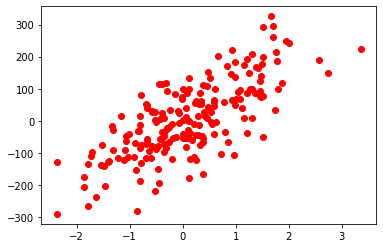

In [ ]:
# plot X and y

plt.scatter(X,y,c='red')
plt.show()

In [ ]:
# create a model

model1 = Sequential()
model1.add(Dense(units=128,activation='relu',input_dim=1))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dense(units=1,activation='linear'))

model1.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [ ]:
# Do train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90)

In [ ]:
history = model1.fit(X_train,y_train,epochs=1000,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/1000
5/5 [==============================] - 0s 21ms/step - loss: 5671.3013 - mse: 5671.3013 - val_loss: 7020.6924 - val_mse: 7020.6924
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 5668.8140 - mse: 5668.8140 - val_loss: 7019.1201 - val_mse: 7019.1201
Epoch 3/1000
5/5 [==============================] - 0s 18ms/step - loss: 5666.6045 - mse: 5666.6045 - val_loss: 6996.5596 - val_mse: 6996.5596
Epoch 4/1000
5/5 [==============================] - 0s 22ms/step - loss: 5662.4741 - mse: 5662.4741 - val_loss: 7013.4126 - val_mse: 7013.4126
Epoch 5/1000
5/5 [==============================] - 0s 16ms/step - loss: 5663.3735 - mse: 5663.3735 - val_loss: 7028.8955 - val_mse: 7028.8955
Epoch 6/1000
5/5 [==============================] - 0s 20ms/step - loss: 5660.8096 - mse: 5660.8096 - val_loss: 7032.8501 - val_mse: 7032.8501
Epoch 7/1000
5/5 [==============================] - 0s 17ms/step - loss: 5658.7593 - mse: 5658.7593 - val_loss: 7029.2412 - val_mse: 7029.2412

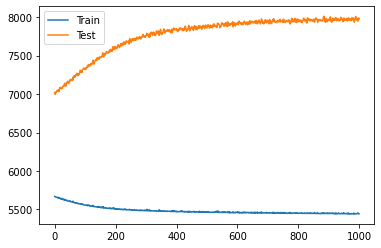

In [ ]:
# plot the loss
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend()
plt.show()


In [ ]:
# create a model using dropouts

model1 = Sequential()
model1.add(Dense(units=128,activation='relu',input_dim=1))
model1.add(Dropout(rate=0.4))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dropout(rate=0.4))
model1.add(Dense(units=1,activation='linear'))

model1.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               256       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(X_train,y_train,epochs=1000,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/1000
5/5 [==============================] - 1s 30ms/step - loss: 13637.5498 - mse: 13637.5498 - val_loss: 11668.1035 - val_mse: 11668.1035
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 13611.8408 - mse: 13611.8408 - val_loss: 11643.1494 - val_mse: 11643.1494
Epoch 3/1000
5/5 [==============================] - 0s 8ms/step - loss: 13577.6699 - mse: 13577.6699 - val_loss: 11619.0889 - val_mse: 11619.0889
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 13554.8643 - mse: 13554.8643 - val_loss: 11592.8857 - val_mse: 11592.8857
Epoch 5/1000
5/5 [==============================] - 0s 7ms/step - loss: 13511.7559 - mse: 13511.7559 - val_loss: 11563.4297 - val_mse: 11563.4297
Epoch 6/1000
5/5 [==============================] - 0s 11ms/step - loss: 13482.7012 - mse: 13482.7012 - val_loss: 11527.5547 - val_mse: 11527.5547
Epoch 7/1000
5/5 [==============================] - 0s 8ms/step - loss: 13427.2891 - mse: 13427.2891 - val_loss: 11485.382

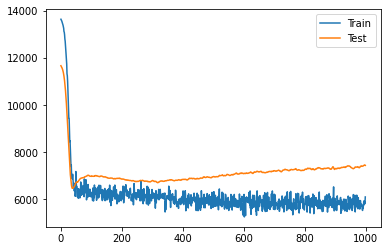

In [ ]:
# plot the loss
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend()
plt.show()

The condition of overfitting is reduced using the dropout layers.